<a href="https://colab.research.google.com/github/rhdtka21/DeepLearningProject/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import matplotlib
import matplotlib.pyplot as plt

# matplotlib 한글 글씨 패치
# 이 셀 실행후 런타임 재시작 필요
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [122]:
import pandas as pd
import numpy as np


# http://kosis.kr/statHtml/statHtml.do?orgId=132&tblId=DT_13204_2011_211&conn_path=I2
# csv 파일을 불러옴
df = pd.read_csv('crime.csv')
# 두번째 행을 열의 이름으로 설정
df = df.rename(columns=df.iloc[0])[1:]

In [123]:
# 데이터 프레임 출력 (상위 5행)
df.head()

,죄종별(1),죄종별(2),죄종별(3),발생건수 (건),검거건수 (건),검거율 (%),검거인원 (명),남자검거인원 (명),여자검거인원 (명),불상검거인원 (명),법인체 (개)
1,총계,소계,소계,1580751,1328609,84,1728602,1286156,329007,113439,12302
2,강력범죄,소계,소계,26787,25811,96.4,28859,27339,1196,324,-
3,강력범죄,살인기수,소계,309,298,96.4,358,289,67,2,-
4,강력범죄,살인기수,살인,226,217,96,269,218,49,2,-
5,강력범죄,살인기수,영아살해,7,7,100,6,-,6,-,-


In [124]:
# 죄종별(1)에 나오는 모든 범죄이름 저장
crime_names = df['죄종별(1)'].drop_duplicates().values[1:]
crime_names

array(['강력범죄', '절도범죄', '폭력범죄', '지능범죄', '풍속범죄', '특별경제범죄', '마약범죄', '보건범죄',
       '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄'],
      dtype=object)

In [125]:
crimes = []
# 각각의 범죄명에 따라 
for crime_name in crime_names:
  # 죄종별(1) 열의 범죄명이 현재 for문의 범죄명이고, 죄종별(2)의 값이 소계인것을 crime으로 저장
  crime = df[(df['죄종별(1)'] == crime_name) & (df['죄종별(2)'] == '소계')]
  # 각 dataframe에 있는 값을 숫자로 변환 (문자열 숫자를 정수형, 실수형으로 변환)
  # 4번째 열부터 숫자변환을 적용함
  crime = crime.apply(pd.to_numeric, errors='coerce').fillna(0).iloc[:, 3:]
  index_num = crime.index[0]
  # crime 데이터 프레임의 index를 범죄명으로 변경
  crime = crime.rename(index={index_num:crime_name})
  crimes.append(crime)

# 각각의 범죄명에 대한 데이터프레임을 모두 합쳐서 하나의 데이터프레임으로 가공
result = pd.concat(crimes, ignore_index=False)
# 발생건수가 5만 이상인것과 5만 미만인것으로 구분
result_big = result[result['발생건수 (건)'] >= 50000]
result_small = result[result['발생건수 (건)'] < 50000]

# 발생건수가 5만 이상인 범죄명과 5만 미만인 범죄명
crime_big_names = result_big.index
crime_small_names = result_small.index

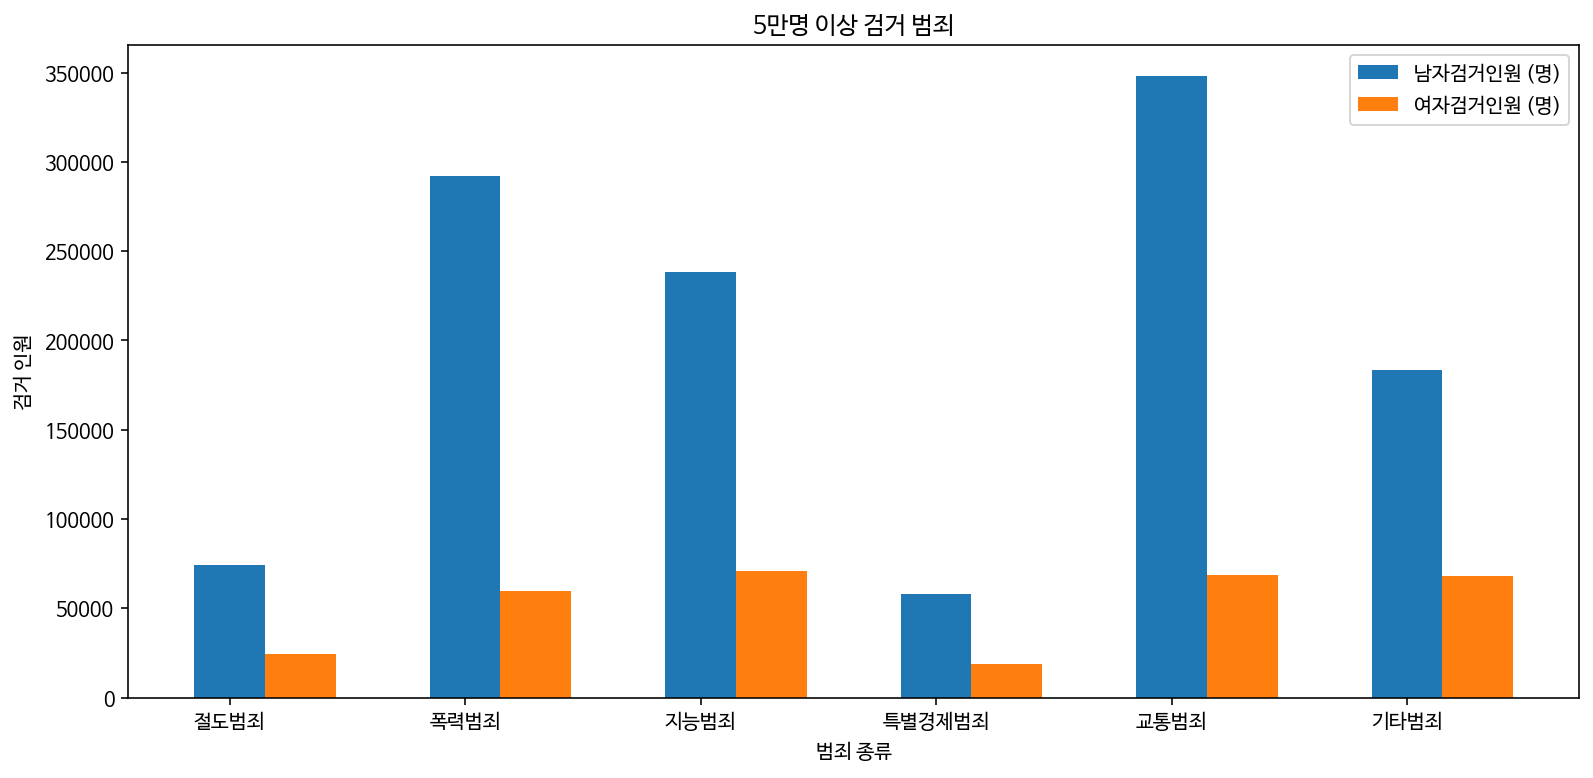

In [126]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)

# x축 설정 : 5만 이상 범죄명 개수만큼 설정
x = np.arange(len(crime_big_names))

# 첫번째 막대그래프 : 남자
p1 = plt.bar(x, result_big['남자검거인원 (명)'].values,  width=0.3, label='남자검거인원 (명)')

# 두번째 막대그래프 : 여자
p2 = plt.bar(x + 0.3, result_big['여자검거인원 (명)'].values, width=0.3, label='여자검거인원 (명)')

# x축의 값을 범죄명으로 대치
plt.xticks(x, crime_big_names)

# 범례 표시
plt.legend()

# x축, y축, 전체 plot title 설정
plt.xlabel('범죄 종류')
plt.ylabel('검거 인원')
plt.title('5만명 이상 검거 범죄')

# plot 표시
plt.show()

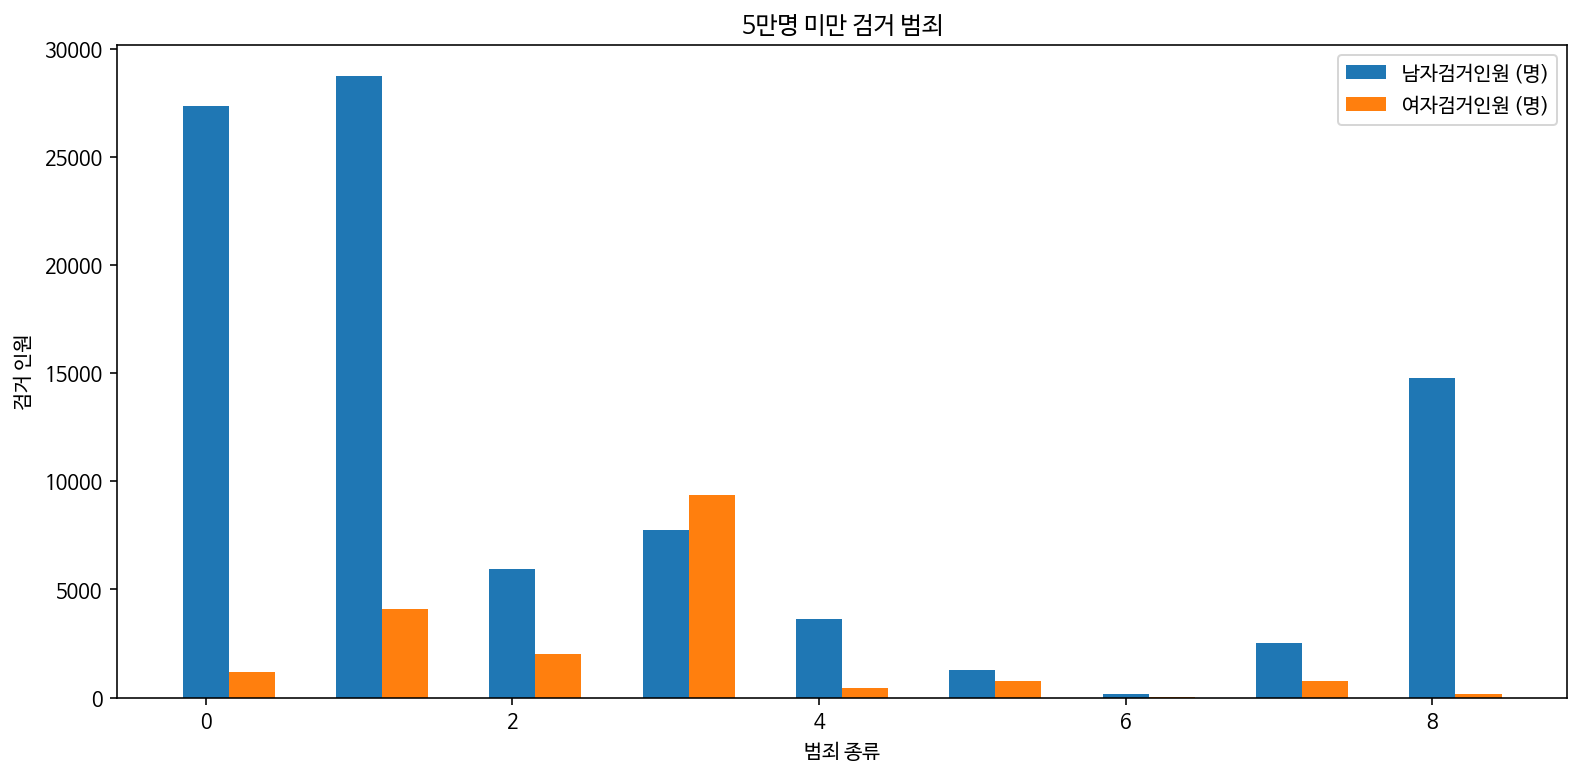

In [127]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(1,1,1)

# x축 설정 : 5만 이상 범죄명 개수만큼 설정
x = np.arange(len(crime_small_names))

# 첫번째 막대그래프 : 남자
p1 = plt.bar(x, result_small['남자검거인원 (명)'].values, width=0.3, label='남자검거인원 (명)')

# 두번째 막대그래프 : 여자
p2 = plt.bar(x + 0.3, result_small['여자검거인원 (명)'].values, width=0.3, label='여자검거인원 (명)')

# x축의 값을 범죄명으로 대치

# 범례 표시
plt.legend()

# x축, y축, 전체 plot title 설정
plt.xlabel('범죄 종류')
plt.ylabel('검거 인원')
plt.title('5만명 미만 검거 범죄')

# plot 표시
plt.show()

In [128]:
# 5만건 미만의 범죄는 모두 '소수범죄'로 묶음
temp = {}
for c in result.columns:
  temp[c] = result_small[c].sum()

# index를 소수범죄로 설정
result_others=pd.DataFrame(temp, index = ['소수범죄'])

result_sum = pd.concat([result_big, result_others],ignore_index=False)

# 소수범죄를 포함한 이름
crime_sum_names = result_sum.index
result_sum

,발생건수 (건),검거건수 (건),검거율 (%),검거인원 (명),남자검거인원 (명),여자검거인원 (명),불상검거인원 (명),법인체 (개)
절도범죄,176809,106669,60.3,100392,74348,24369,1675,8.0
폭력범죄,287611,251586,87.5,357264,291787,59445,6032,30.0
지능범죄,344698,245413,71.2,383560,238233,70997,74330,872.0
특별경제범죄,53994,46222,85.6,82135,58096,18643,5396,3391.0
교통범죄,408371,397277,97.3,423483,347858,68570,7055,869.0
기타범죄,221862,198903,89.7,268177,183675,68027,16475,5050.0
소수범죄,87406,82539,1017.6,113591,92159,18956,2476,2082.0


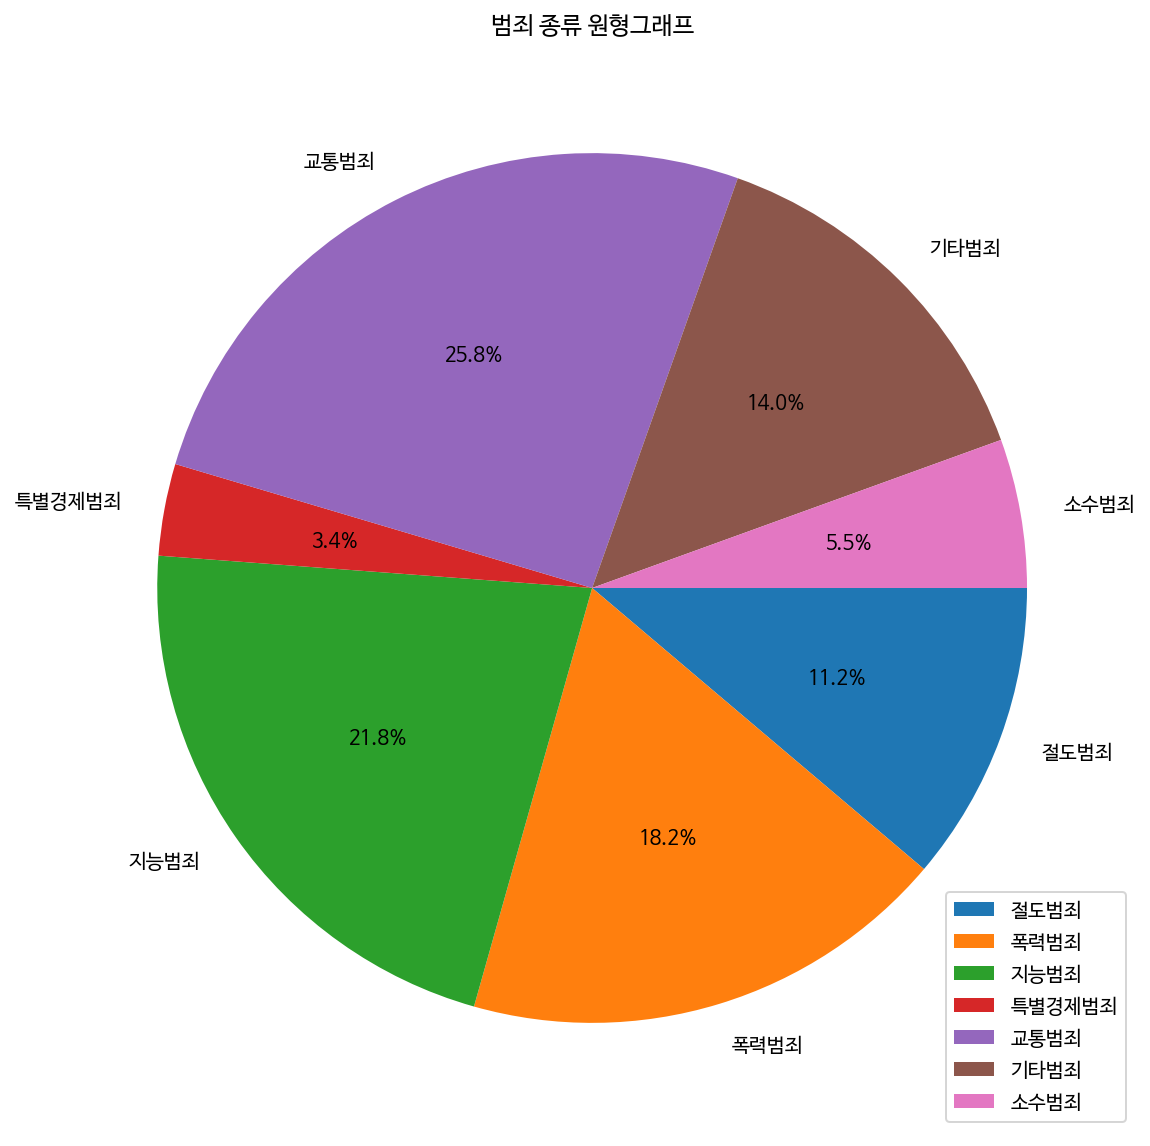

In [129]:
# plot figure 사이즈 : 1300 * 600 해상도
plt.figure(figsize=(10, 10))

# 원형그래프 : 발생건수
plt.pie(result_sum['발생건수 (건)'], labels = crime_sum_names, counterclock=False, autopct='%1.1f%%')

# 범례 표시
plt.legend()

# 제목설정
plt.title('범죄 종류 원형그래프')

# plot 표시
plt.show()

In [135]:
# http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN0001_ENG&conn_path=I2
# csv 파일을 불러옴
df = pd.read_csv('population.csv')

df

,행정구역별,연령별,항목,단위,1925 년,1930 년,1935 년,1940 년,1944 년,1949 년,1955 년,1960 년,1966 년,1970 년,1975 년,1980 년,1985 년,1990 년,1995 년,2000 년,2005 년,2010 년
0,전국,계,인구,명,19020030.00,20438108.00,22208102.00,23547465.00,25120174.00,20166756.0,21502386.00,24989241.00,29159640.00,31435252.00,34678972.00,37406815.00,40419652.00,43390374.0,44553710.00,45985289.00,47041434.00,47990761.0
1,전국,계,남자,명,9726150.00,10398889.00,11271005.00,11839295.00,12521173.00,10188238.0,10752973.00,12543968.00,14684147.00,15779615.00,17445246.00,18749306.00,20227564.00,21770919.0,22357352.00,23068181.00,23465650.00,23840896.0
2,전국,계,여자,명,9293880.00,10039219.00,10937097.00,11708170.00,12599001.00,9978518.0,10749413.00,12445273.00,14475493.00,15655637.00,17233726.00,18657509.00,20192088.00,21619455.0,22196358.00,22917108.00,23575784.00,24149865.0
3,전국,계,성비,NaN,104.65,103.58,103.05,101.12,99.38,102.1,100.03,100.79,101.44,100.79,101.23,100.49,100.18,100.7,100.73,100.66,99.53,98.7
4,전국,0 - 4세,인구,명,3069586.00,3281683.00,3671581.00,3897658.00,4278618.00,NaN,3376648.00,3549564.00,4480921.00,4316143.00,4227360.00,3794692.00,3702555.00,3279790.0,3427409.00,3130258.00,2382350.00,2219084.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,함경남도,80 - 84세,성비,NaN,90.90,NaN,NaN,NaN,88.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2628,함경남도,85세이상,인구,명,700.00,NaN,NaN,NaN,1875.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2629,함경남도,85세이상,남자,명,301.00,NaN,NaN,NaN,742.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2630,함경남도,85세이상,여자,명,399.00,NaN,NaN,NaN,1133.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# 시군구별 이름 중에서 전국과 시만 저장
sector_names = []

# 모든 행정구역중에서 전국 및 OO시만 저장
for sector_name in df['행정구역별'].drop_duplicates().values:
  if sector_name == '전국' or sector_name[-1] == '시':
    sector_names.append(sector_name)
sector_names

['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']

In [143]:
sectors = []
# 각각의 구역에 따라서 
for sector_name in sector_names:
  # 행정구역이 현재 for문의 구역이고, 인구수의 전체 합을 sector로 저장
  sector = df[(df['행정구역별'] == sector_name) & (df['연령별'] == '계') & (df['항목'] == '인구')]
  sectors.append(sector)

# 각각의 구역의 데이터 프레임을 전체 하나의 데이터 프레임으로 합함
result = pd.concat(sectors, ignore_index=False)
# 행의 index를 행정 구역 이름으로 설정
result = result.set_index('행정구역별')
result

,연령별,항목,단위,1925 년,1930 년,1935 년,1940 년,1944 년,1949 년,1955 년,1960 년,1966 년,1970 년,1975 년,1980 년,1985 년,1990 년,1995 년,2000 년,2005 년,2010 년
행정구역별,,,,,,,,,,,,,,,,,,,,,
전국,계,인구,명,19020030.0,20438108.0,22208102.0,23547465.0,25120174.0,20166756.0,21502386.0,24989241.0,29159640.0,31435252.0,34678972.0,37406815.0,40419652.0,43390374.0,44553710.0,45985289.0,47041434.0,47990761.0
서울특별시,계,인구,명,NaN,NaN,NaN,NaN,NaN,1437670.0,1568746.0,2445402.0,3793280.0,5525262.0,6879464.0,8350616.0,9625755.0,10603250.0,10217177.0,9853972.0,9762546.0,9631482.0
부산광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1426019.0,1876391.0,2450125.0,3156931.0,3512113.0,3795892.0,3809618.0,3655437.0,3512547.0,3393191.0
대구광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2028370.0,2227979.0,2445288.0,2473990.0,2456016.0,2431774.0
인천광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1384916.0,1816328.0,2304176.0,2466338.0,2517680.0,2632035.0
광주광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1138717.0,1257063.0,1350948.0,1413644.0,1466143.0
대전광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1049122.0,1270873.0,1365961.0,1438551.0,1490158.0
울산광역시,계,인구,명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012110.0,1044934.0,1071673.0


In [133]:
# 데이터 프레임에서 열 제목중 년도값만 추출
years = result.columns[3:]
years

Index(['1925 년', '1930 년', '1935 년', '1940 년', '1944 년', '1949 년', '1955 년',
       '1960 년', '1966 년', '1970 년', '1975 년', '1980 년', '1985 년', '1990 년',
       '1995 년', '2000 년', '2005 년', '2010 년'],
      dtype='object')

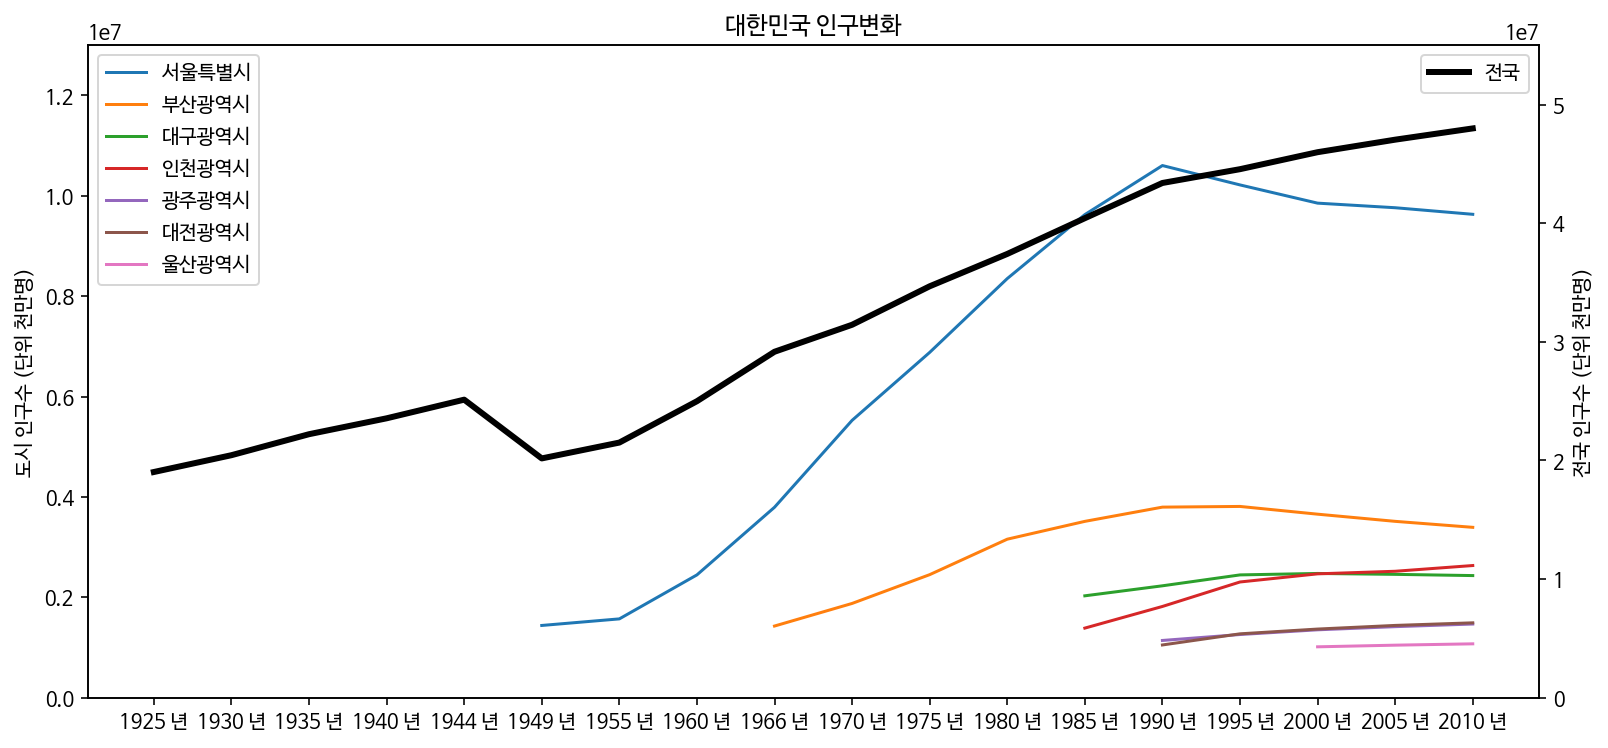

In [134]:
# plot figure 사이즈 : 1300 * 600 해상도
fig = plt.figure(figsize=(13,6))

# 두개의 y축 설정
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

# 전국을 제외한 각 시의 인구수 변화를 ax1 plot에 그림
for sector_name in sector_names[1:]:
  ax1.plot(years, result.loc[sector_name].apply(pd.to_numeric, errors='coerce')[3:], label=sector_name)

# 전국의 인구수 변화를 ax2 plot에 그림
ax2.plot(years, result.loc['전국'].apply(pd.to_numeric, errors='coerce')[3:], label='전국', color='black', linewidth=3)

# 범례 위치를 지정해서 표시
ax1.legend(loc='upper left')
plt.legend(loc='upper right')

# x축, y축, 전체 plot title 설정
plt.xlabel('년도 (5년단위)')
ax1.set_ylabel('도시 인구수 (단위 천만명)')
ax2.set_ylabel('전국 인구수 (단위 천만명)')

plt.title('대한민국 인구변화')

# y축 범위 설정
ax2.set_ylim(0, 55000000)
ax1.set_ylim(0, 13000000)

# plot 표시
plt.show()